In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001390777"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001390777
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,Bank of New York Mellon Corp
Ticker,BK


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,59.0,2.985102e+01,4.934947e+00,1.556000e+01,2.599000e+01,3.011000e+01,3.273000e+01,3.936000e+01
interest income,59.0,1.022508e+09,3.069556e+08,8.020000e+08,8.405000e+08,8.830000e+08,1.025000e+09,1.920000e+09
net income,66.0,5.972273e+08,6.121660e+08,-2.457000e+09,5.560000e+08,6.940000e+08,8.742500e+08,1.181000e+09
net interest income,69.0,7.448986e+08,1.227811e+08,1.700000e+07,7.200000e+08,7.570000e+08,7.740000e+08,1.070000e+09
provision for loan losses,65.0,9.323077e+06,4.505001e+07,-6.100000e+07,-1.900000e+07,-3.000000e+06,1.600000e+07,1.630000e+08
total revenue,53.0,3.634000e+09,6.041816e+08,1.000000e+08,3.600000e+09,3.728000e+09,3.851000e+09,4.611000e+09


# Plots

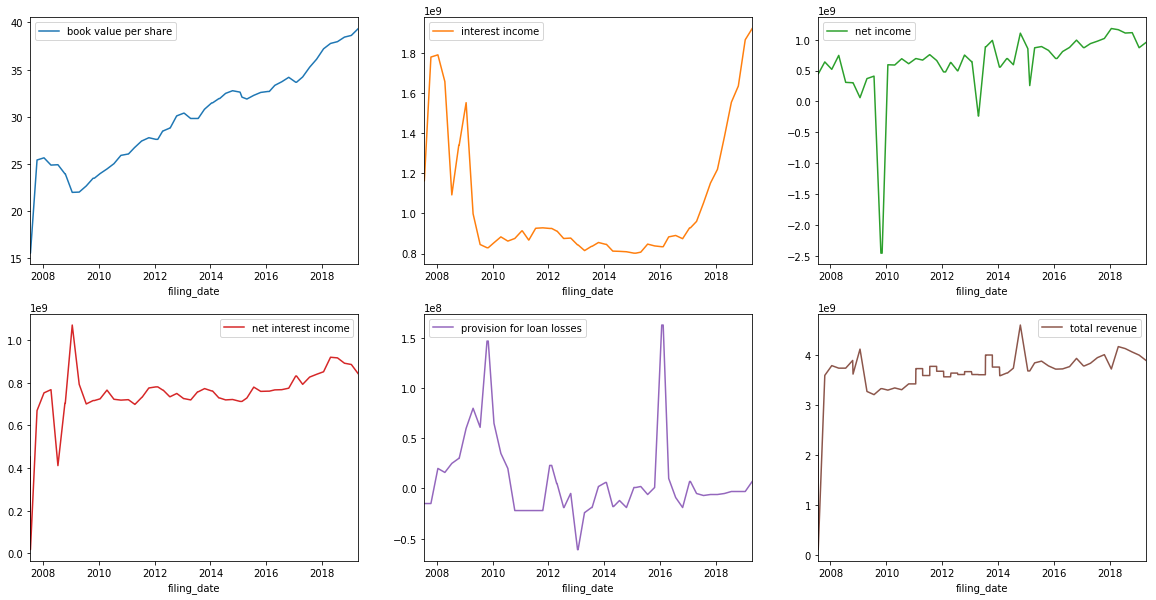

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                
0001390777 net income                                      2014Q4  duplicate   
           net interest income                             2007Q2  duplicate   
           provision for loan losses                       2007Q3    missing   
           provision for loan losses  2011Q1 to 2011Q2: 2 periods    missing   
           provision for loan losses                       2018Q4    missing   
           total revenue                                   2007Q2  duplicate   
           total revenue                                   2008Q2    missing   

                                               message  
cik        item                                         
0001390777 net income                 Duplicate period  
           net interest income        Duplicate period  
           provision for loan losses    Missing period  
           provision for loan losses    Missing period  
           provision for loan losses    Missing period  
           total revenue              Duplicate period  
           total revenue                Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()